In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook


# Pandas data introduction

Sigmoid w abd b find better to correct result using mathamatical , w , b not in the data set own direction , best w ,b can get better result

In [2]:
url = "https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [4]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
dir(df) # functions related to df

['FM',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__'

In [7]:
len(df) , df.shape

(109, (109, 40))

In [8]:
df.loc[5] # data show specific

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [9]:
df_short = df[23:29]
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
23,3,1,43,97.0,345,1.2,5.1,5,5.0,3,...,2,10,2,68.1,0.0,5,3,2000,94,1
24,0,10,29,150.0,322,1.5,8.2,5,5.0,3,...,6,23,6,71.0,32.0,6,4,2750,21,1
25,0,8,43,202.0,914,1.2,10.6,2,5.0,3,...,6,7,6,77.5,64.0,5,4,5000,94,1
26,0,8,43,170.0,456,1.2,10.8,2,5.0,3,...,4,7,6,77.2,128.0,5,3,3000,94,1
27,0,8,38,155.0,350,1.3,9.3,5,5.0,3,...,6,7,6,77.0,64.0,6,4,3000,19,1


In [10]:
df_thin = df[["stand_by_time","expandable_memory","price","battery_capacity","is_liked"]]
df_thin

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0
...,...,...,...,...,...
104,540,256.0,54900,3410,1
105,400,200.0,56900,3600,1
106,384,0.0,59000,2750,1
107,250,0.0,64500,1810,1


In [11]:
df_like = df_thin[df_thin["is_liked"] == 1]
df_like

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
3,385,32.0,5799,3000,1
6,230,128.0,5999,1700,1
7,182,32.0,6599,2000,1
...,...,...,...,...,...
103,600,256.0,52699,3430,1
104,540,256.0,54900,3410,1
105,400,200.0,56900,3600,1
106,384,0.0,59000,2750,1


In [12]:
df_like.shape # 92 data liked , 1

(92, 5)

In [13]:
df_thin["price"].describe() # mean value , min , max , 

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [14]:
df_short.describe() # all data describe 

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,0.500000,6.000000,40.000000,155.666667,500.666667,1.350000,8.933333,4.000000,5.0,3.0,...,4.666667,10.500000,4.833333,73.916667,53.333333,5.333333,3.500000,2975.000000,66.833333,1.0
std,1.224745,3.949684,5.796551,34.191617,230.316015,0.207364,2.101111,1.549193,0.0,0.0,...,1.632993,6.252999,1.834848,3.922967,43.720323,0.516398,0.547723,1083.397434,36.744614,0.0
min,0.000000,1.000000,29.000000,97.000000,322.000000,1.200000,5.100000,2.000000,5.0,3.0,...,2.000000,7.000000,2.000000,68.100000,0.000000,5.000000,3.000000,2000.000000,19.000000,1.0
25%,0.000000,2.750000,39.250000,151.250000,346.250000,1.200000,8.475000,2.750000,5.0,3.0,...,4.000000,7.000000,3.750000,71.425000,32.000000,5.000000,3.000000,2262.500000,35.500000,1.0
50%,0.000000,8.000000,43.000000,157.500000,403.000000,1.250000,9.450000,5.000000,5.0,3.0,...,5.000000,8.000000,6.000000,74.850000,48.000000,5.000000,3.500000,2875.000000,86.500000,1.0
75%,0.000000,8.000000,43.000000,167.500000,576.750000,1.450000,10.350000,5.000000,5.0,3.0,...,6.000000,9.750000,6.000000,77.150000,64.000000,5.750000,4.000000,3000.000000,94.000000,1.0
max,3.000000,10.000000,44.000000,202.000000,914.000000,1.700000,10.800000,5.000000,5.0,3.0,...,6.000000,23.000000,6.000000,77.500000,128.000000,6.000000,4.000000,5000.000000,94.000000,1.0


In [15]:
df_like = df_thin[df_thin["is_liked"] == 1]["price"].mean()
df_like

19393.239130434784

In [16]:
grb_by = df_thin.groupby(['is_liked'])
grb_by.describe()

stand_by_time                                                       \
                 count        mean         std    min     25%    50%    75%   
is_liked                                                                      
0                 17.0  457.235294  157.094927  240.0  345.00  400.0  580.0   
1                 92.0  394.945652  178.876246  160.0  258.25  354.0  482.0   

                 expandable_memory              ...     price           \
             max             count        mean  ...       75%      max   
is_liked                                        ...                      
0          840.0              17.0   68.235294  ...  25500.00  37766.0   
1         1093.0              92.0  111.217391  ...  24924.75  64500.0   

         battery_capacity                                                   \
                    count         mean         std     min     25%     50%   
is_liked                                                                     
0                    17.0  2874.941176  591.777035  1624.0  2600.0  2900.0   
1                    92.0  2835.652174  668.850998  1560.0  2457.5  2900.0   

                          
             75%     max  
is_liked                  
0         3000.0  4100.0  
1         3100.0  5000.0  

[2 rows x 32 columns]

# Ploting Sigmoid Function

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [17]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [18]:
sigmoid(-10,.5,0) # can change values 

0.0066928509242848554

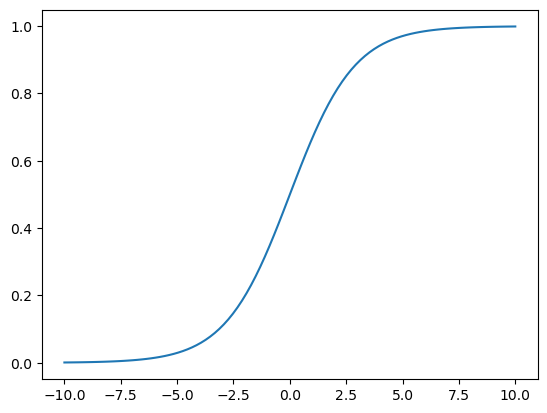

In [19]:
w = 0.7  #@param {type: "slider", min: -5, max: 5, step: 0.1}
b = 0  #@param {type: "slider", min: -5, max: 5, step: 0.1}  # Corrected min/max values
x = np.linspace(-10,10,100)

y = sigmoid(x,w,b)

plt.plot(x,y)
plt.show()

# $S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [20]:
def sigmoid_2D(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [21]:
sigmoid_2D(1,0,.5,0,0)

0.6224593312018546

In [22]:
w = 0.7  #@param {type: "slider", min: -5, max: 5, step: 0.1}
b = 0  #@param {type: "slider", min: -5, max: 5, step: 0.1}  # Corrected min/max values

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

xx1 , xx2 = np.meshgrid(x1,x2) # combination build

print(x1.shape,x2.shape,xx1.shape,xx2.shape)



(100,) (100,) (100, 100) (100, 100)


In [24]:
w1 = 2
w2 = -0.5
b = 0
y = sigmoid_2D(xx1,xx2,w1,w2,b)

print(y)
y.shape

[[3.05902227e-07 4.58200006e-07 6.86321350e-07 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.76512343e-07 4.14177956e-07 6.20382314e-07 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.49946123e-07 3.74385369e-07 5.60778436e-07 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [1.69970758e-11 2.54593159e-11 3.81346046e-11 ... 9.99999439e-01
  9.99999626e-01 9.99999750e-01]
 [1.53640631e-11 2.30132842e-11 3.44707806e-11 ... 9.99999380e-01
  9.99999586e-01 9.99999723e-01]
 [1.38879439e-11 2.08022576e-11 3.11589625e-11 ... 9.99999314e-01
  9.99999542e-01 9.99999694e-01]]


(100, 100)

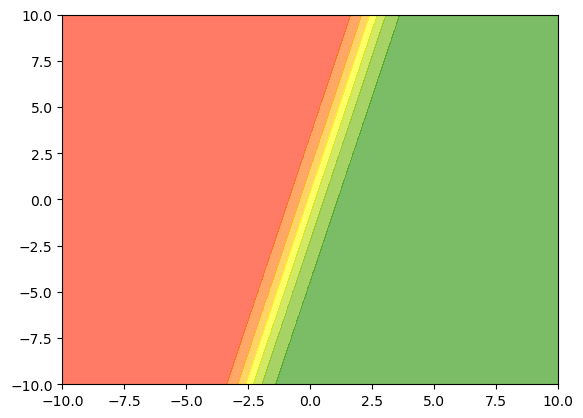

In [28]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
plt.contourf(xx1, xx2, y, cmap=my_cmap, alpha=0.6)


### 3D plot

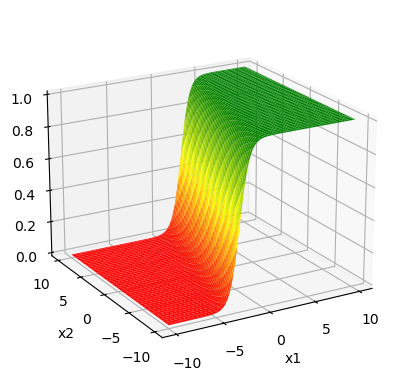

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d') # Corrected way to create 3D axes

ax.plot_surface(xx1, xx2, y, cmap=my_cmap)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(20, 240) # Adjust viewing angle , 120 angle , 50 hihgt

plt.show()